In [ ]:
pip install pandas matplotlib seaborn


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Retail_Prices_of _Products (1).csv')

print(df.head())

df.columns = df.columns.str.strip()

print(df.info())

df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'])

   Year    Month         GEO Product Category  \
0  2017  January  Province 1   Meat & Poultry   
1  2017  January  Province 1   Meat & Poultry   
2  2017  January  Province 1   Meat & Poultry   
3  2017  January  Province 1   Meat & Poultry   
4  2017  January  Province 1   Meat & Poultry   

                              Products  VALUE Taxable  Total tax rate  \
0      Beef stewing cuts, per kilogram  12.66      No            11.0   
1    Beef striploin cuts, per kilogram  21.94      No            11.0   
2  Beef top sirloin cuts, per kilogram  13.44      No            11.0   
3          Beef rib cuts, per kilogram  20.17      No            11.0   
4            Ground beef, per kilogram   9.12      No            11.0   

   Value after tax  Essential  COORDINATE      UOM  
0            12.66  Essential       11.10  Dollars  
1            21.94  Essential       11.20  Dollars  
2            13.44  Essential       11.30  Dollars  
3            20.17  Essential       11.41  Dollars  
4

<ipython-input-7-a747016f4a08>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'])


In [ ]:
# Análise geral
print("Resumo estatístico:\n", df[['VALUE', 'Value after tax']].describe())

Resumo estatístico:
                VALUE  Value after tax
count  118482.000000    118482.000000
mean        5.437324         5.515499
std         5.192748         5.215311
min         0.300000         0.300000
25%         2.850000         2.910000
50%         3.990000         4.050000
75%         5.810000         5.947500
max        48.450000        48.450000


In [ ]:
# Essenciais vs Não-Essenciais
essenciais = df[df['Essential'] == 'Essential']
nao_essenciais = df[df['Essential'] == 'Non-Essential']

print("\nMédia dos preços (Essenciais):", essenciais['VALUE'].mean())
print("Média dos preços (Não-Essenciais):", nao_essenciais['VALUE'].mean())


Média dos preços (Essenciais): 5.763193673469387
Média dos preços (Não-Essenciais): 3.8781373889268624


In [ ]:
df['Tax_Difference'] = df['Value after tax'] - df['VALUE']

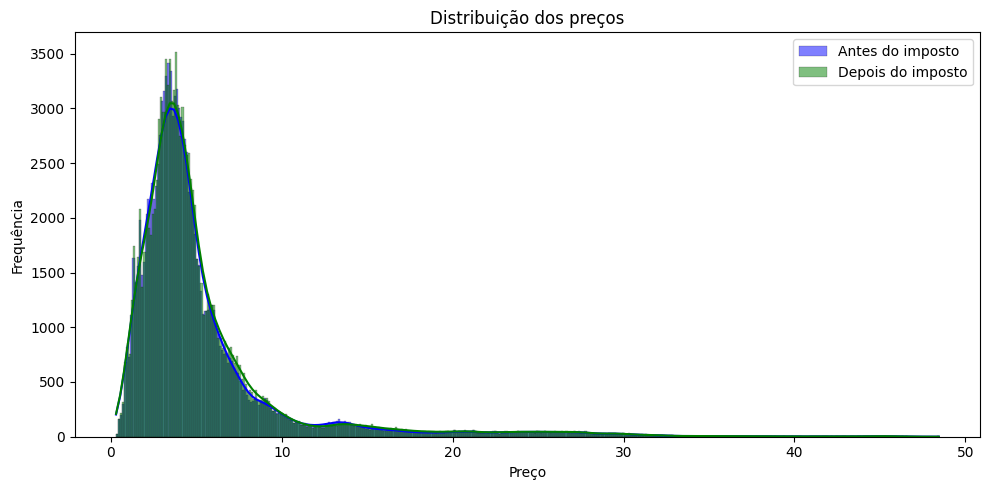

In [ ]:
#Distribuição de preços antes e depois do imposto
plt.figure(figsize=(10,5))
sns.histplot(df['VALUE'], label='Antes do imposto', color='blue', kde=True)
sns.histplot(df['Value after tax'], label='Depois do imposto', color='green', kde=True)
plt.legend()
plt.title('Distribuição dos preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

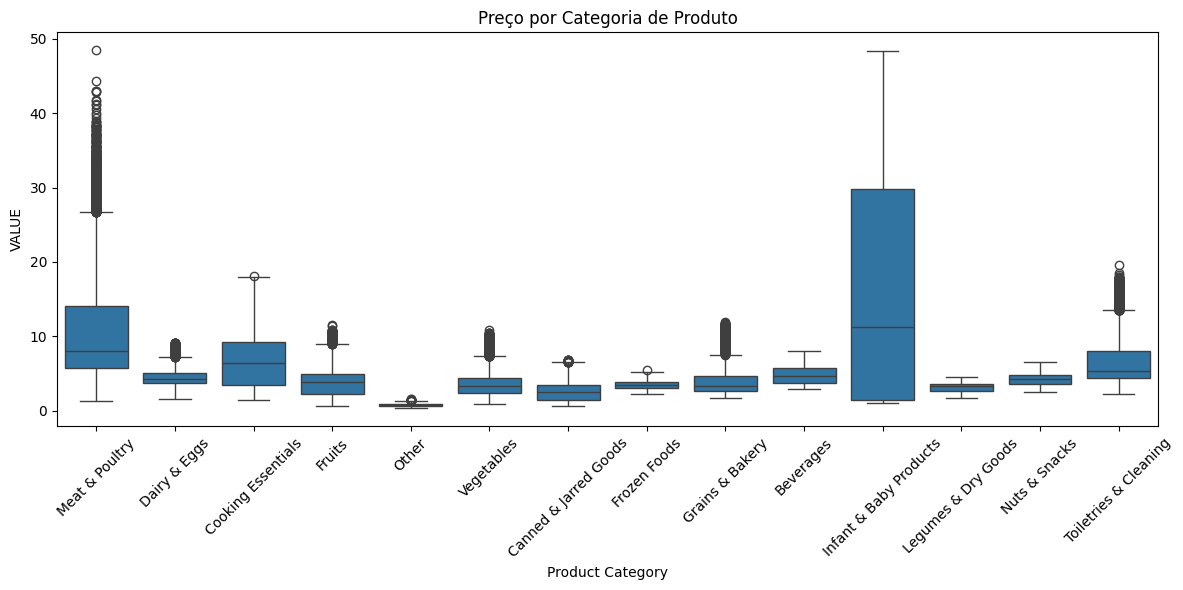

In [ ]:
# Boxplot por categoria de produto
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Product Category', y='VALUE')
plt.xticks(rotation=45)
plt.title('Preço por Categoria de Produto')
plt.tight_layout()
plt.show()

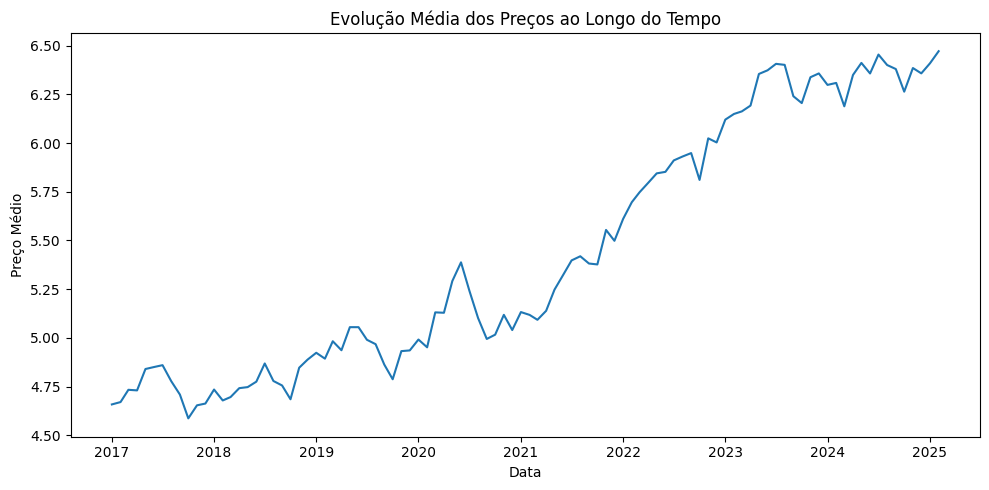

In [ ]:
# Evolução do preço ao longo do tempo (média mensal)
df_grouped = df.groupby('Date')[['VALUE']].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=df_grouped, x='Date', y='VALUE')
plt.title('Evolução Média dos Preços ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço Médio')
plt.tight_layout()
plt.show()

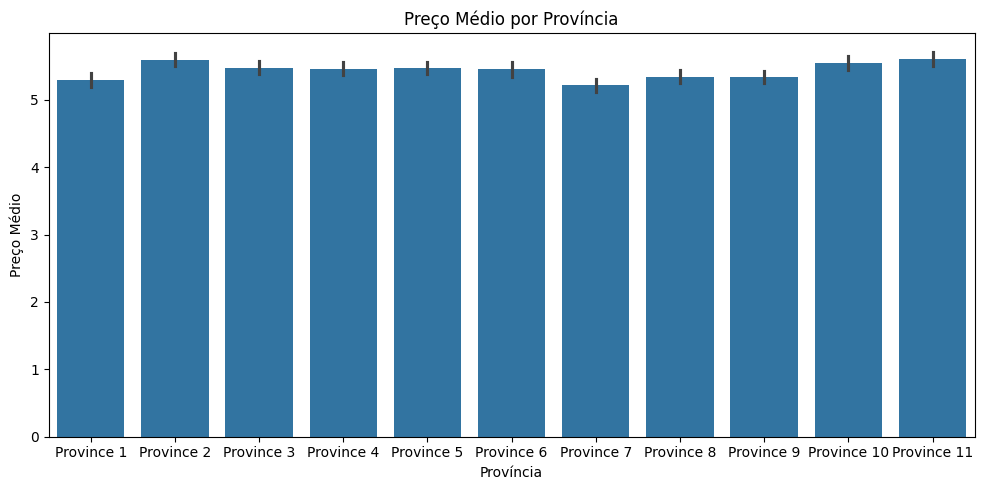

In [ ]:
# Preço médio por província
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GEO', y='VALUE', estimator='mean')
plt.title('Preço Médio por Província')
plt.xlabel('Província')
plt.ylabel('Preço Médio')
plt.tight_layout()
plt.show()